In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,  train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [67]:
#importing data 

In [93]:
data_b = pd.read_csv('Provisional_Death_Counts_for_Influenza__Pneumonia__and_COVID-19.csv')

In [94]:
data_b

,Data As Of,Start_Week,End Week,MMWRyear,MMWRweek,Group,Indicator,Jurisdiction,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths,Pneumonia_or_Influenza,Pneumonia_Influenza_COVID_19_Deaths,Footnote
0,4/8/2021,2/1/2020,2/1/2020,2020,5,By week,Week-ending,United States,All Ages,0.0,58680.0,3807.0,480.0,4287.0,4287.0,NaN
1,4/8/2021,2/1/2020,2/1/2020,2020,5,By week,Week-ending,United States,0-17 years,0.0,658.0,14.0,17.0,31.0,31.0,NaN
2,4/8/2021,2/1/2020,2/1/2020,2020,5,By week,Week-ending,United States,18-64 years,0.0,14047.0,705.0,184.0,889.0,889.0,NaN
3,4/8/2021,2/1/2020,2/1/2020,2020,5,By week,Week-ending,United States,65+ years,0.0,43975.0,3088.0,279.0,3367.0,3367.0,NaN
4,4/8/2021,2/1/2020,2/1/2020,2020,5,By week,Week-ending,Alabama,All Ages,0.0,1059.0,55.0,16.0,71.0,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15619,4/8/2021,4/3/2021,4/3/2021,2021,13,By week,Week-ending,HHS Region 9,65+ years,77.0,1962.0,120.0,NaN,121.0,159.0,One or more data cells have counts between 1-9...
15620,4/8/2021,4/3/2021,4/3/2021,2021,13,By week,Week-ending,HHS Region 10,All Ages,22.0,587.0,20.0,0.0,20.0,32.0,NaN
15621,4/8/2021,4/3/2021,4/3/2021,2021,13,By week,Week-ending,HHS Region 10,0-17 years,0.0,NaN,0.0,0.0,0.0,0.0,One or more data cells have counts between 1-9...
15622,4/8/2021,4/3/2021,4/3/2021,2021,13,By week,Week-ending,HHS Region 10,18-64 years,NaN,104.0,NaN,0.0,NaN,10.0,One or more data cells have counts between 1-9...


In [70]:
data_b.columns 

Index(['Data As Of', 'Start_Week', 'End Week', 'MMWRyear', 'MMWRweek', 'Group',
       'Indicator', 'Jurisdiction', 'Age_Group', 'COVID_19_Deaths',
       'Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths',
       'Pneumonia_or_Influenza', 'Pneumonia_Influenza_COVID_19_Deaths',
       'Footnote'],
      dtype='object')

In [71]:
data_b.describe() # Descriptive analysis of the data

,MMWRyear,MMWRweek,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths,Pneumonia_or_Influenza,Pneumonia_Influenza_COVID_19_Deaths
count,15624.000000,15624.000000,13296.000000,13994.000000,13055.000000,12194.000000,13026.000000,13239.000000
mean,2020.209677,24.387097,242.960063,1693.217522,206.994791,2.886666,210.817212,332.362112
std,0.407091,15.531273,1073.785485,5691.585380,776.145723,23.128756,785.044556,1309.022493
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,10.000000,0.000000,105.000000,10.000000,0.000000,10.000000,13.000000
50%,2020.000000,22.500000,26.000000,435.500000,40.000000,0.000000,41.000000,59.000000
75%,2020.000000,38.000000,128.000000,1305.750000,135.000000,0.000000,137.000000,206.000000
max,2021.000000,53.000000,24585.000000,83691.000000,16104.000000,652.000000,16136.000000,27814.000000


In [72]:
df1 = pd.Series(data_b.Age_Group).value_counts() #frequency distribution of the Age group

In [73]:
df1

0-17 years     3906
65+ years      3906
All Ages       3906
18-64 years    3906
Name: Age_Group, dtype: int64

In [74]:
#Testing the reslionship of the data using scatterplot

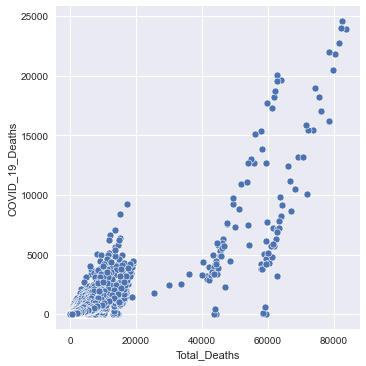

In [75]:
sns.relplot(x='Total_Deaths', y ='COVID_19_Deaths', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death

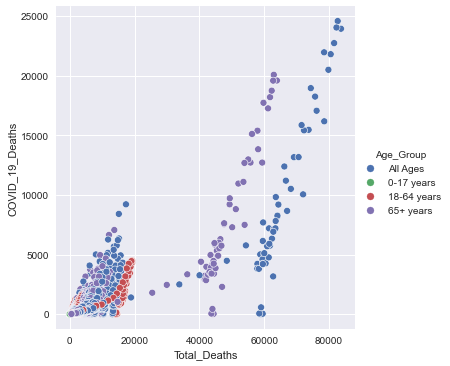

In [76]:
sns.relplot(x='Total_Deaths', y ='COVID_19_Deaths', hue='Age_Group', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death

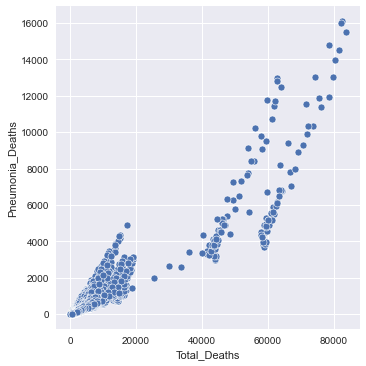

In [77]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_Deaths', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death

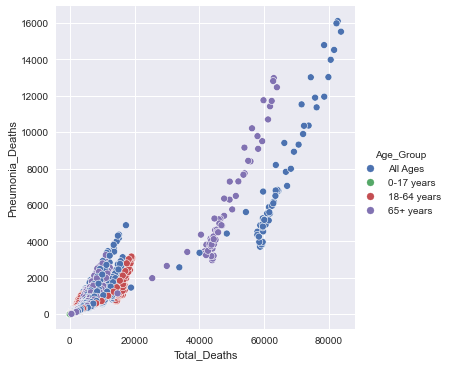

In [78]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_Deaths', hue='Age_Group', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death by age

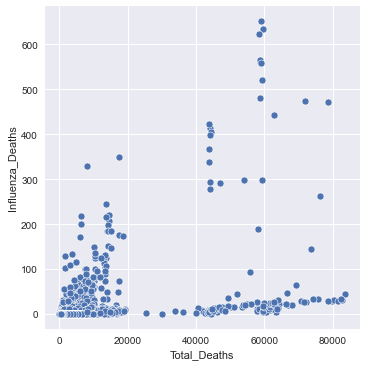

In [79]:
sns.relplot(x='Total_Deaths', y ='Influenza_Deaths', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death by Age

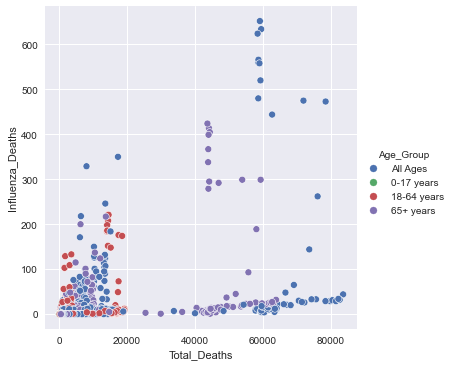

In [80]:
sns.relplot(x='Total_Deaths', y ='Influenza_Deaths', hue='Age_Group', data=data_b)  #relationship between the respondents that died by Influenza_Deaths and the total cases of death by Age

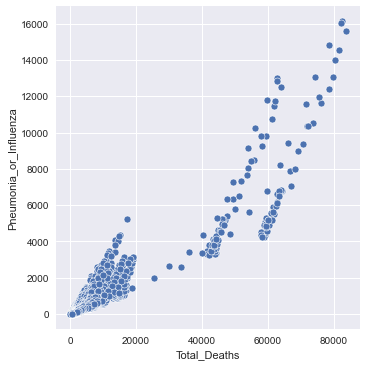

In [81]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_or_Influenza', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death

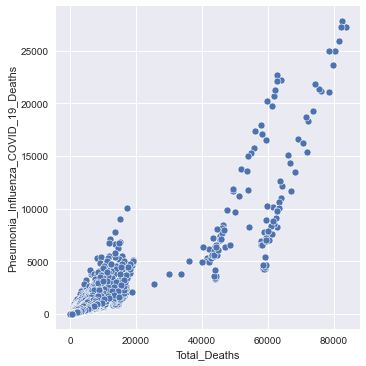

In [82]:
sns.relplot(x='Total_Deaths', y ='Pneumonia_Influenza_COVID_19_Deaths', data=data_b) #relationship between the respondents that died by covid-19 and the total cases of death

In [83]:
data_b.columns 

Index(['Data As Of', 'Start_Week', 'End Week', 'MMWRyear', 'MMWRweek', 'Group',
       'Indicator', 'Jurisdiction', 'Age_Group', 'COVID_19_Deaths',
       'Total_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths',
       'Pneumonia_or_Influenza', 'Pneumonia_Influenza_COVID_19_Deaths',
       'Footnote'],
      dtype='object')

In [84]:
unique_states = list(data['Jurisdiction'].unique())
unique_states

['United States',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York City',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'HHS Region 1',
 'HHS Region 2',
 'HHS Region 3',
 'HHS Region 4',
 'HHS Region 5',
 'HHS Region 6',
 'HHS Region 7',
 'HHS Region 8',
 'HHS Region 9',
 'HHS Region 10']

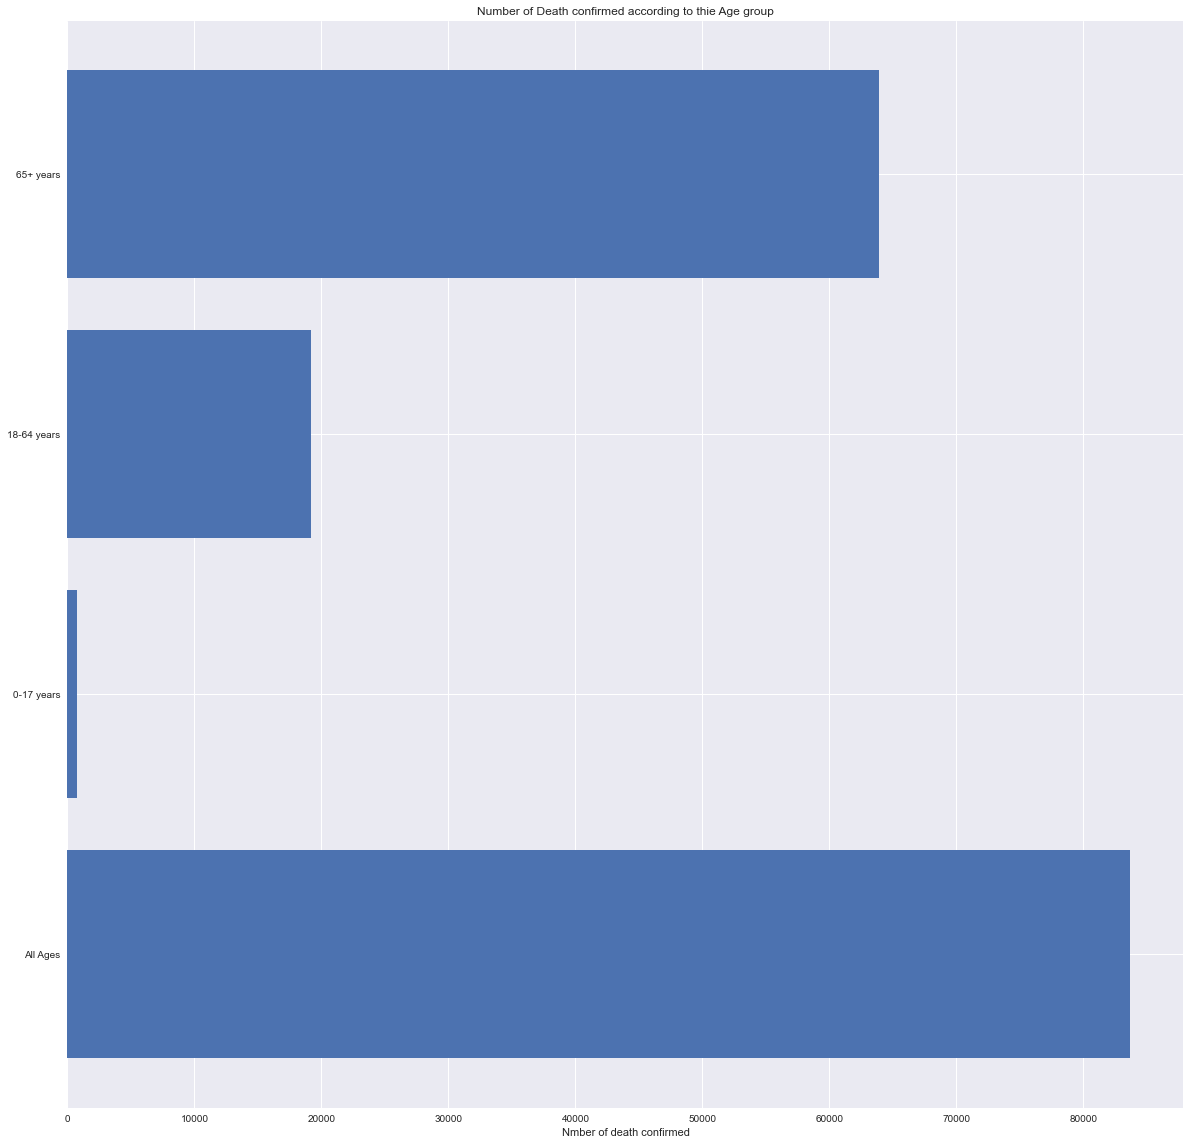

In [85]:
age = data_b.Age_Group
total_death = data_b.Total_Deaths
plt.figure(figsize=(20,20))
plt.barh(age, total_death)
plt.title('Number of Death confirmed according to thie Age group')
plt.xlabel('Nmber of death confirmed')
plt.show()

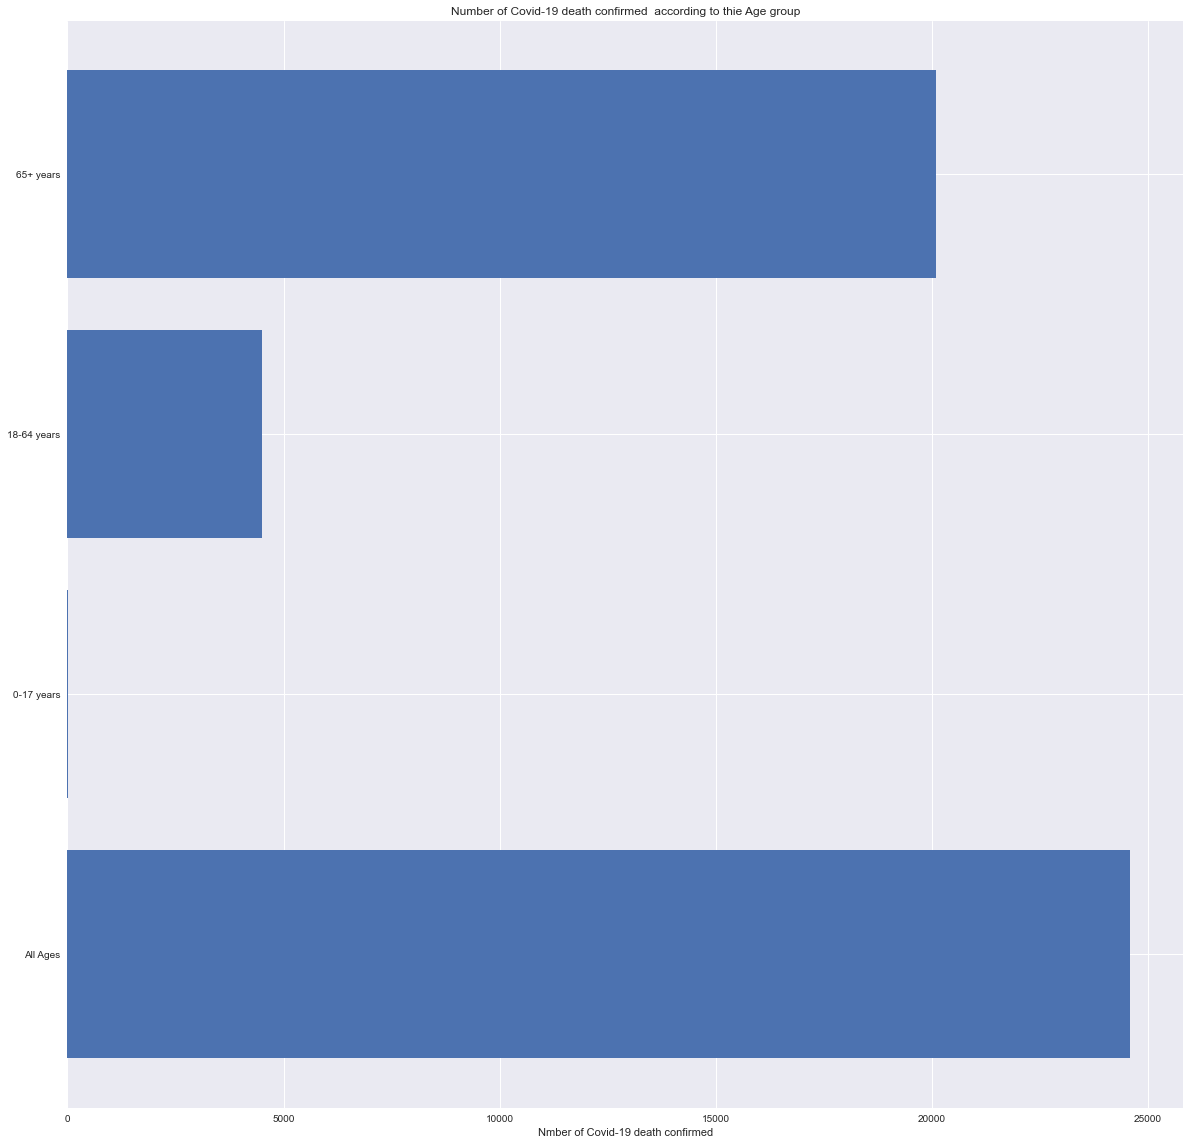

In [86]:
age = data_b.Age_Group
covid = data_b.COVID_19_Deaths
plt.figure(figsize=(20,20))
plt.barh(age, covid)
plt.title('Number of Covid-19 death confirmed  according to thie Age group')
plt.xlabel('Nmber of Covid-19 death confirmed')
plt.show()

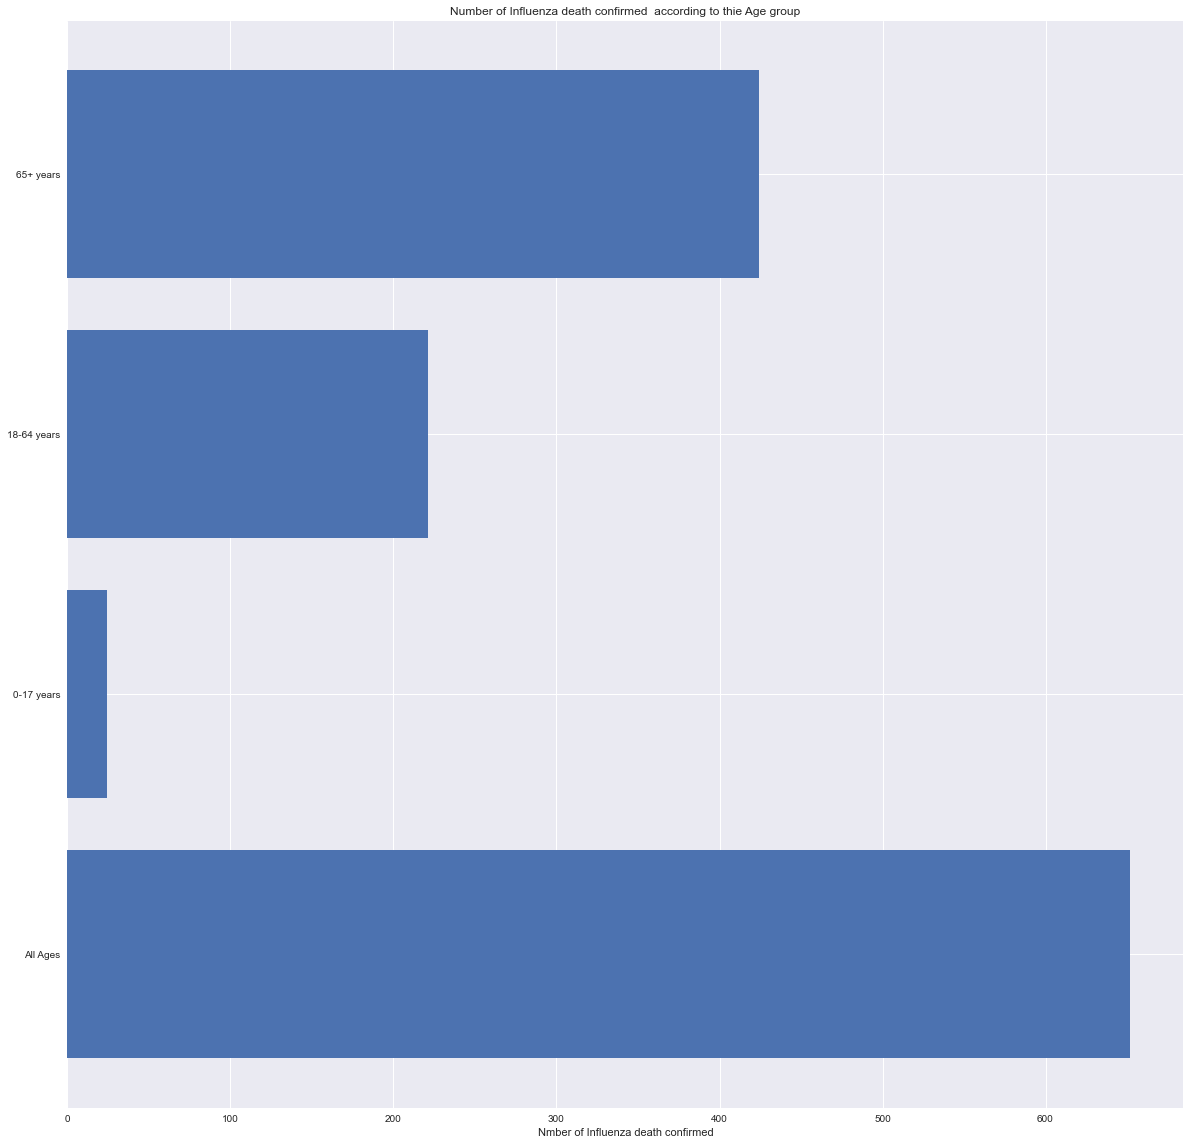

In [87]:
age = data_b.Age_Group
influenza = data_b.Influenza_Deaths
plt.figure(figsize=(20,20))
plt.barh(age, influenza)
plt.title('Number of Influenza death confirmed  according to thie Age group')
plt.xlabel('Nmber of Influenza death confirmed')
plt.show()

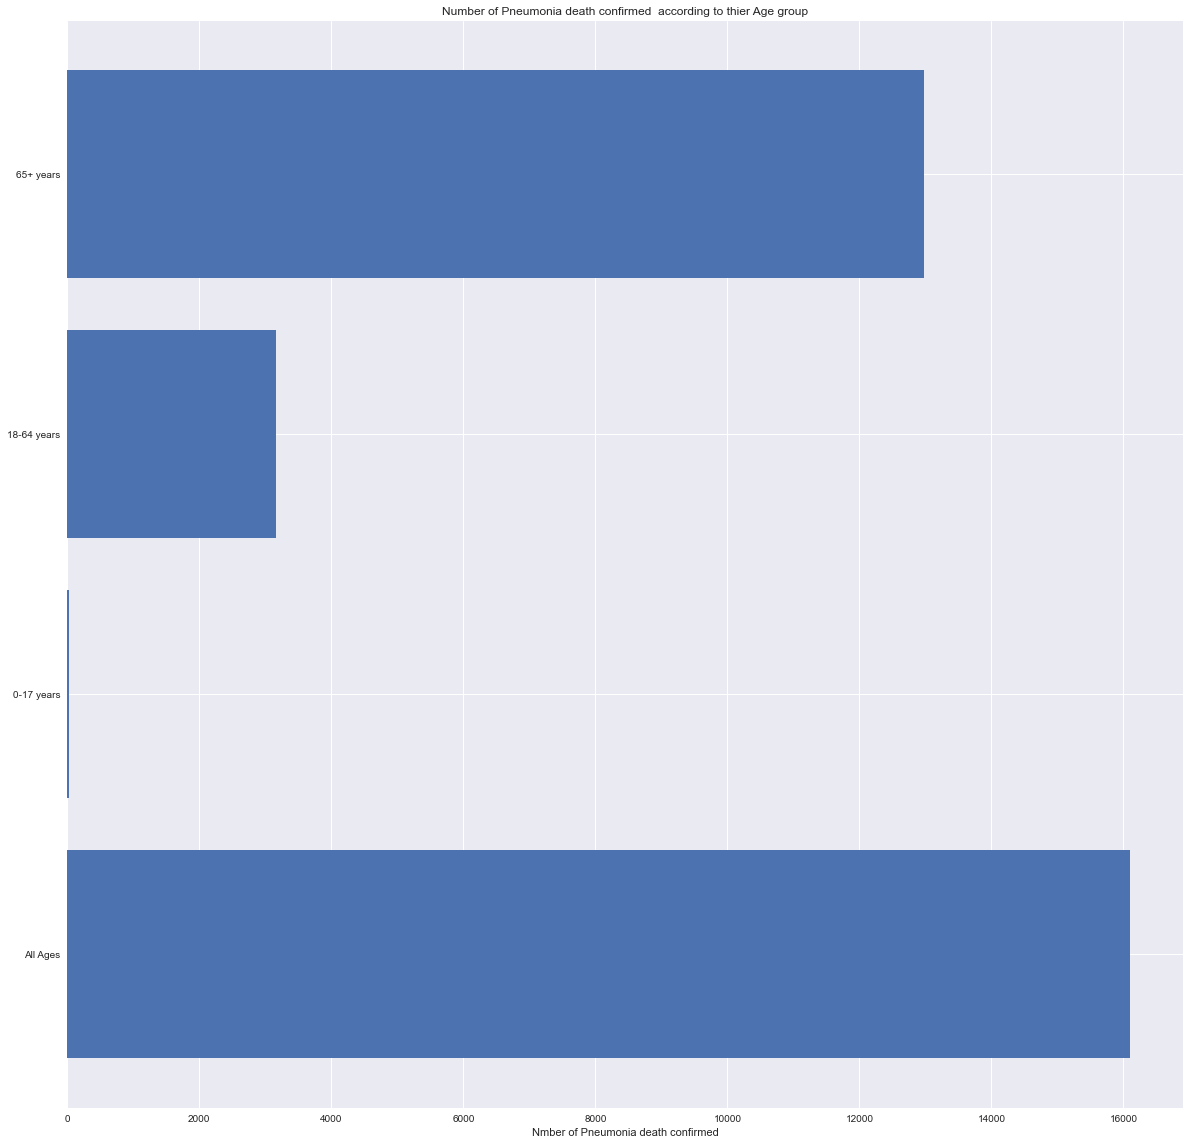

In [88]:
age = data_b.Age_Group
pneumonia = data_b.Pneumonia_Deaths
plt.figure(figsize=(20,20))
plt.barh(age, pneumonia)
plt.title('Number of Pneumonia death confirmed  according to thier Age group')
plt.xlabel('Nmber of Pneumonia death confirmed')
plt.show()

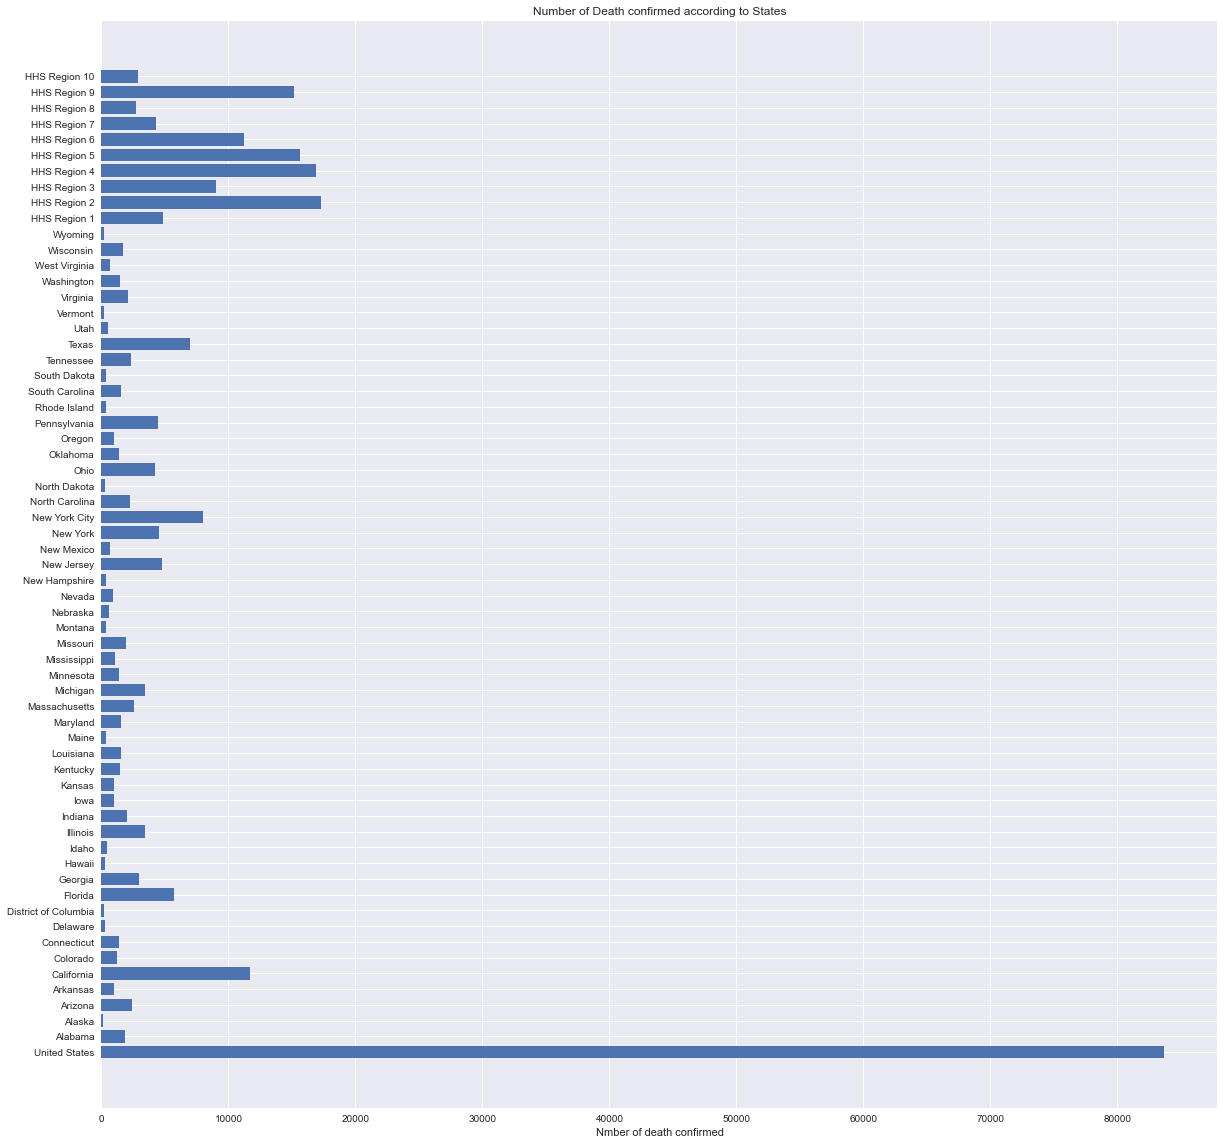

In [89]:
state = data_b.Jurisdiction
total_death = data_b.Total_Deaths
plt.figure(figsize=(20,20))
plt.barh(state, total_death)
plt.title('Number of Death confirmed according to States')
plt.xlabel('Nmber of death confirmed')
plt.show()



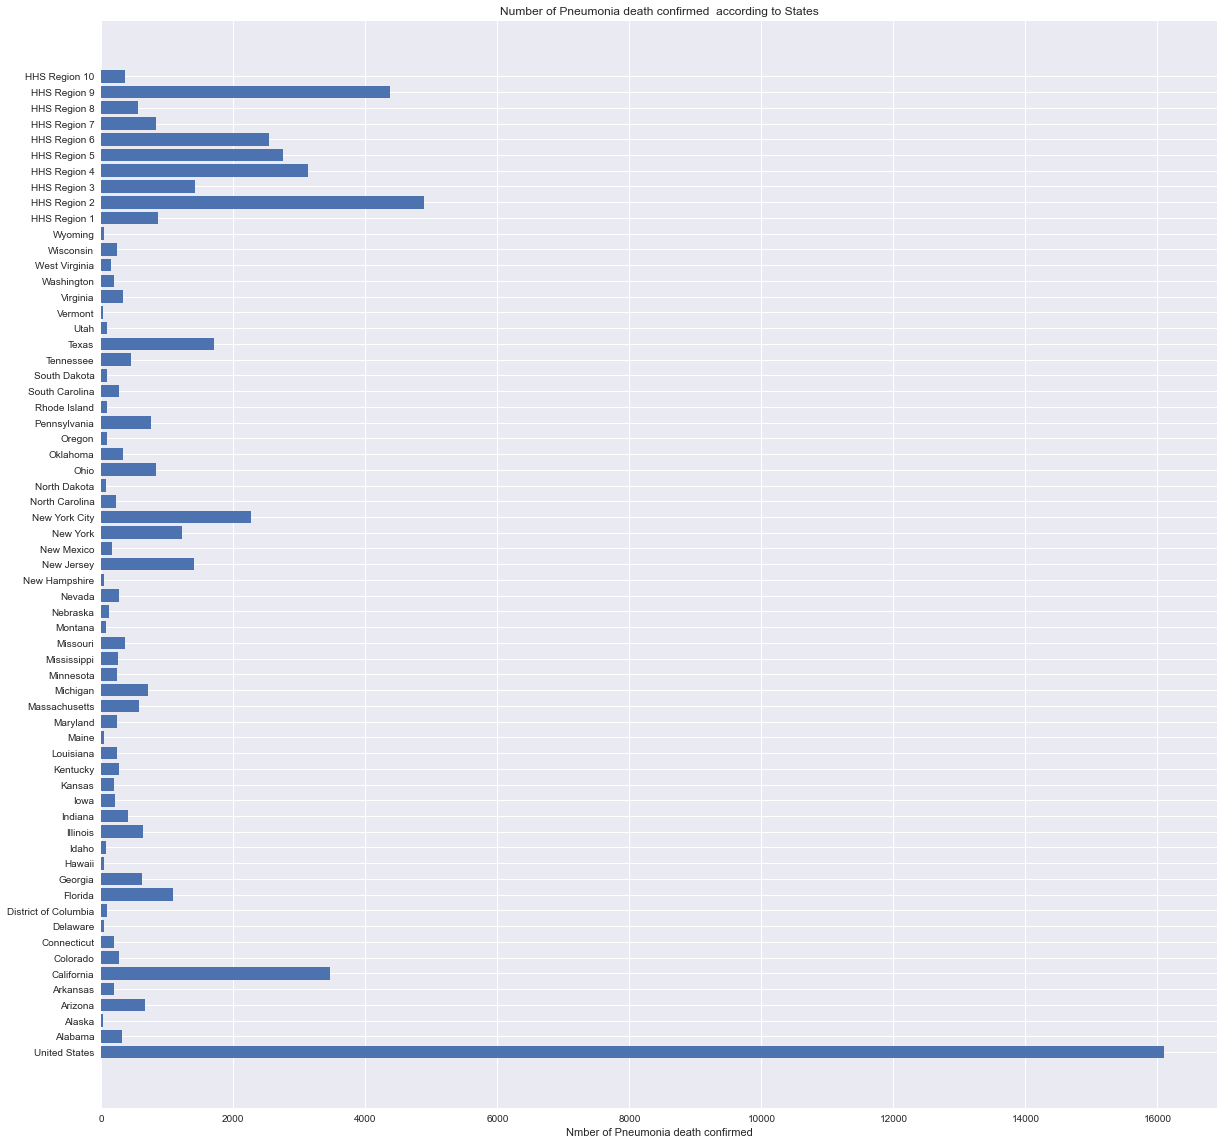

In [90]:
state = data_b.Jurisdiction
pneumonia = data_b.Pneumonia_Deaths
plt.figure(figsize=(20,20))
plt.barh(state, pneumonia)
plt.title('Number of Pneumonia death confirmed  according to States')
plt.xlabel('Nmber of Pneumonia death confirmed')
plt.show()



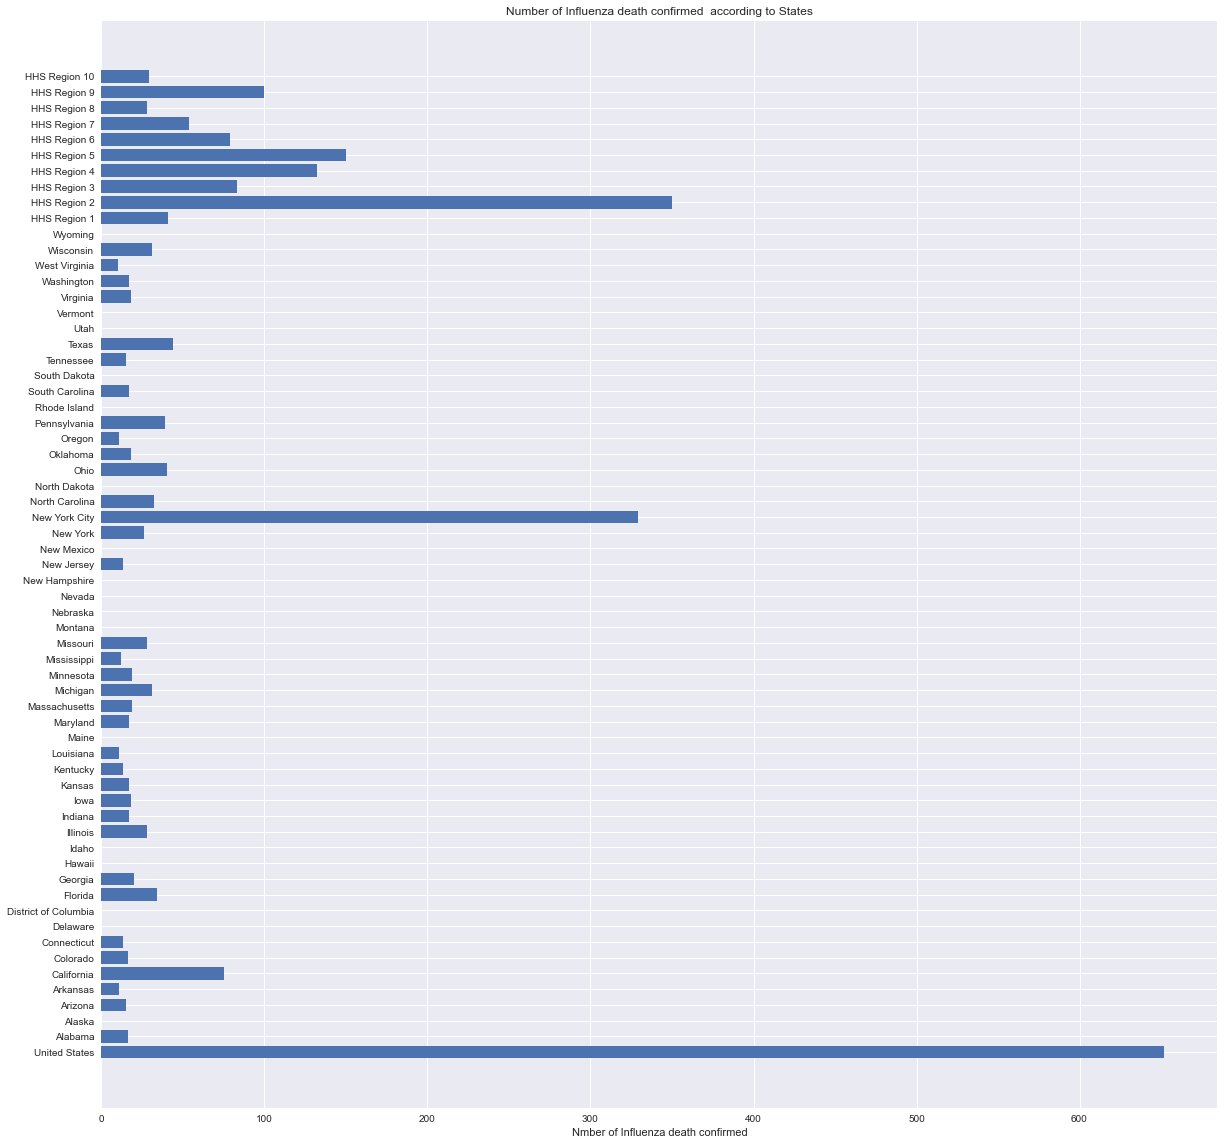

In [91]:
state = data_b.Jurisdiction
influenza = data_b.Influenza_Deaths
plt.figure(figsize=(20,20))
plt.barh(state, influenza)
plt.title('Number of Influenza death confirmed  according to States')
plt.xlabel('Nmber of Influenza death confirmed')
plt.show()

In [95]:
date = data_b.Start_Week
days_since_12_29 = np.array([i for i in range(len(date))]).reshape(-1, 1)

In [96]:
days_since_12_29

array([[    0],
       [    1],
       [    2],
       ...,
       [15621],
       [15622],
       [15623]])

In [101]:
data_b.corr() #correllation analysis of the dataset

,MMWRyear,MMWRweek,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Influenza_Deaths,Pneumonia_or_Influenza,Pneumonia_Influenza_COVID_19_Deaths
MMWRyear,1.000000,-0.576644,0.042636,-0.005616,0.025972,-0.063172,0.023501,0.024569
MMWRweek,-0.576644,1.000000,0.031842,0.010295,0.010558,-0.115497,0.006681,0.017583
COVID_19_Deaths,0.042636,0.031842,1.000000,0.834722,0.969772,0.219771,0.965652,0.987604
Total_Deaths,-0.005616,0.010295,0.834722,1.000000,0.934505,0.474140,0.937912,0.905899
Pneumonia_Deaths,0.025972,0.010558,0.969772,0.934505,1.000000,0.368657,0.999644,0.994424
Influenza_Deaths,-0.063172,-0.115497,0.219771,0.474140,0.368657,1.000000,0.394417,0.326706
Pneumonia_or_Influenza,0.023501,0.006681,0.965652,0.937912,0.999644,0.394417,1.000000,0.992993
Pneumonia_Influenza_COVID_19_Deaths,0.024569,0.017583,0.987604,0.905899,0.994424,0.326706,0.992993,1.000000
